# Введение в машинное обучение для Java-разработчиков
### Практическое задание 3. Нейронные сети.
### Дата выдачи: 2.11.2023

### Дедлайн: 23:59MSK 23.11.2023

## О задании
В этом задании мы попытаемся разобраться в устройстве двухслойной нейронной сети.

## Оценивание и штрафы
См. оценки в следующей ячейке

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов, что автоматически ведет к несдаче курса. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в комментариях. 
В данном задании есть необязательные бонусные задания, выполнение которых добавляет баллы в карму :)

## Формат сдачи
Задания сдаются путем форка основного репозитория, коммита решения в мастер-ветку вашего форка и оповещении преподавателя о выполнении ДЗ. 

## Часть 1. Двухслойная нейронная сеть для задачи бинарной классификации.

На первом слое используюйте функцию активации ReLU, на выходном - sigmoid

##### На оценку "удовлетворительно" необходимо реализовать следующие функции:

- [task] - функция активации ReLU
- [task] - функция активации Sigmoid
- [task] - функция бинарной кросс-энтропи

  
#####  На оценку "хорошо" необходимо реализовать следующие функции:
- [task] - реализуйте функцию прямого прохода сети

#####  На оценку "отлично" необходимо реализовать следующие функции:
 - [task] - реализуйте функцию обратного прохода сети. Необходимо реализовать расчет градиентов для всех весов (легче всего это сделать в матричной форме), используя свойства расчета производной от сложной функции.
 - [task] - реализуйте обучение нейронной сети. Сделайте цикл по "эпохам", а рамках эпохи перебирайте последовательно все объекты обучающей выборки. Далее на каждом объекте считайте функцию потерь и градиенты.

In [1]:
import numpy as np

class TwoLayerNeuralNetwork:
    def __init__(self, input_size=2, hidden_size=2, output_size=1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def ReLU(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def binary_cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def _forward(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.ReLU(z1)

        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.sigmoid(z2)

        return a1, a2

    def forward(self, X):
        return self._forward(X)[-1]

    def backward(self, X, y, learning_rate=0.1):
        m = X.shape[0]

        a1, a2 = self._forward(X)

        errors_2 = a2 - y
        dW2 = 1/m * np.dot(a1.T * (a2 * (1 - a2)).T, errors_2) 
        db2 = 1/m * np.sum(errors_2, axis=0)

        errors_1 = np.dot(errors_2, self.W2.T) 
        dW1 = 1/m * np.dot((X * (X > 0)).T, errors_1)
        db1 = 1/m * np.sum(errors_1, axis=0)

        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def fit(self, X, y, num_epochs=100, learning_rate=0.1, log_frequency=100):
        for epoch in range(num_epochs):
            y_pred = self.forward(X)

            loss = self.binary_cross_entropy_loss(y, y_pred)

            self.backward(X, y, learning_rate)

            if epoch % log_frequency == 0:
                print(f"Epoch {epoch}, Loss: {loss}")


## Часть 2. Двухслойная нейронная сеть 

Попробуйте обучить реализацию вашей сети на небольшом синтетическом датасете.

Epoch 0, Loss: 1.8288685038777064
Epoch 100, Loss: 0.18496449909214474
Epoch 200, Loss: 0.15637524599222172
Epoch 300, Loss: 0.14412799371629523
Epoch 400, Loss: 0.13744291142353585
Epoch 500, Loss: 0.13280436194620127
Epoch 600, Loss: 0.13021191052242276
Epoch 700, Loss: 0.1290652319084047
Epoch 800, Loss: 0.12866251138167212
Epoch 900, Loss: 0.12805017749735767


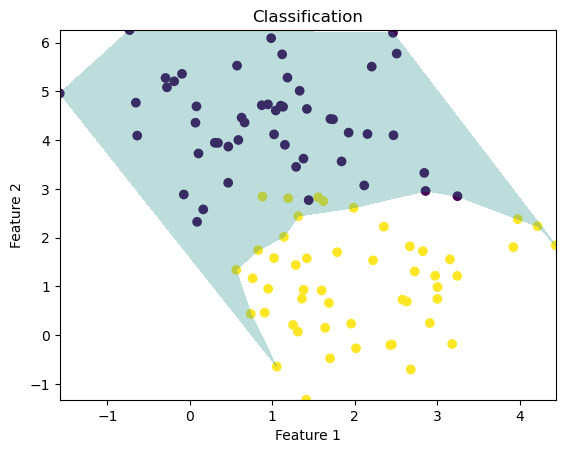

Epoch 0, Loss: 0.1278191299601794
Epoch 100, Loss: 0.1277679334722801
Epoch 200, Loss: 0.12659077290174434
Epoch 300, Loss: 0.12471848571392931
Epoch 400, Loss: 0.1236195605094276
Epoch 500, Loss: 0.12236016981569788
Epoch 600, Loss: 0.1202173259040933
Epoch 700, Loss: 0.1182585554957195
Epoch 800, Loss: 0.11642095234191889
Epoch 900, Loss: 0.11461437083278828


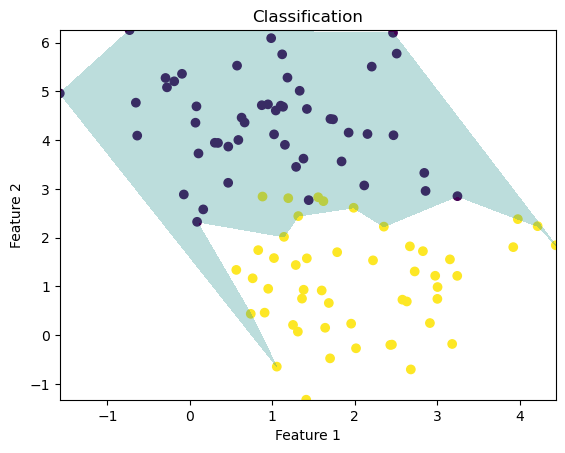

Epoch 0, Loss: 0.11299037228741785
Epoch 100, Loss: 0.11163422000292984
Epoch 200, Loss: 0.11039516330385656
Epoch 300, Loss: 0.10917804242862361
Epoch 400, Loss: 0.10805768468586377
Epoch 500, Loss: 0.10679704489370878
Epoch 600, Loss: 0.10573999968671496
Epoch 700, Loss: 0.10483888752943604
Epoch 800, Loss: 0.10407191719047391
Epoch 900, Loss: 0.10342179685952171


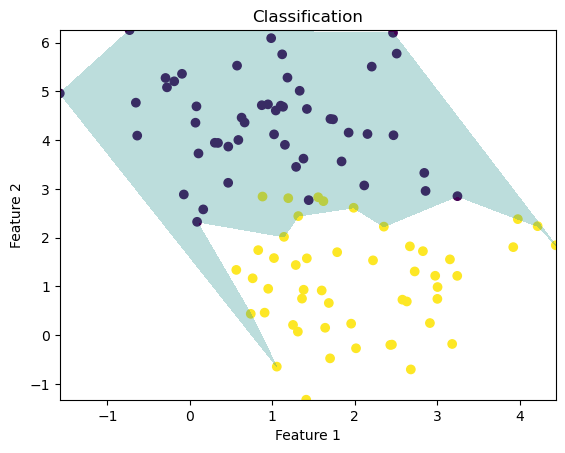

Epoch 0, Loss: 0.10284884538699349
Epoch 100, Loss: 0.10229487214317474
Epoch 200, Loss: 0.10179246351912102
Epoch 300, Loss: 0.10136119033361986
Epoch 400, Loss: 0.10100151629386411
Epoch 500, Loss: 0.10068626295627586
Epoch 600, Loss: 0.10040680518028908
Epoch 700, Loss: 0.10017520919219046
Epoch 800, Loss: 0.09995898162938194
Epoch 900, Loss: 0.09877084113936897


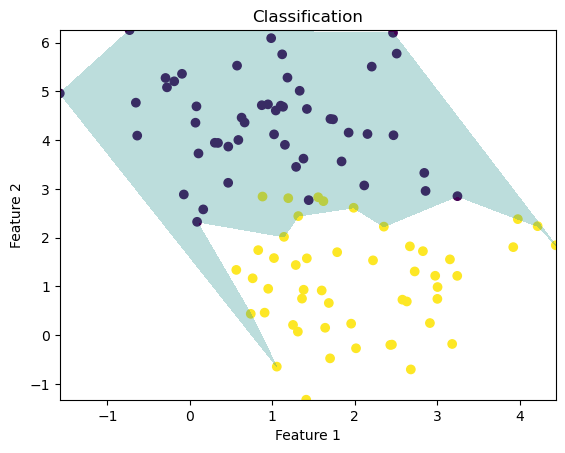

Epoch 0, Loss: 0.09745614747428953
Epoch 100, Loss: 0.09628161141743836
Epoch 200, Loss: 0.095262250740379
Epoch 300, Loss: 0.09428628033691994
Epoch 400, Loss: 0.09356363394972413
Epoch 500, Loss: 0.09298064820856437
Epoch 600, Loss: 0.0924800733729979
Epoch 700, Loss: 0.09192710452761173
Epoch 800, Loss: 0.09151270425599738
Epoch 900, Loss: 0.09119569013441903


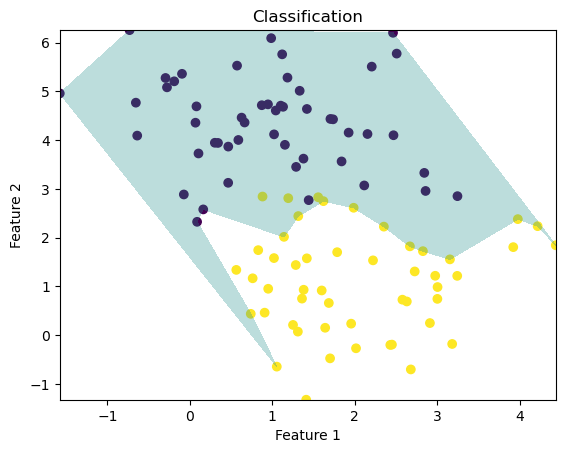

Epoch 0, Loss: 0.08984096015045073
Epoch 100, Loss: 0.08856430345923874
Epoch 200, Loss: 0.08740812982285329
Epoch 300, Loss: 0.08630998618039348
Epoch 400, Loss: 0.08525822545318709
Epoch 500, Loss: 0.08425492113805749
Epoch 600, Loss: 0.08395711837066351
Epoch 700, Loss: 0.08429412945310605
Epoch 800, Loss: 0.08480615333383758
Epoch 900, Loss: 0.0854714663212088


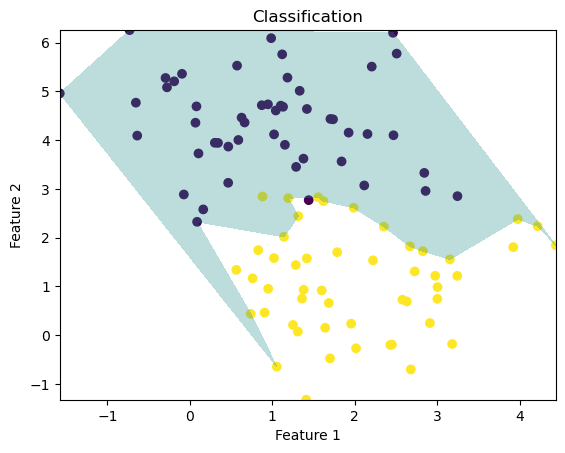

Epoch 0, Loss: 0.08625012877105456
Epoch 100, Loss: 0.08671247847546056
Epoch 200, Loss: 0.08610577451736044
Epoch 300, Loss: 0.0855054197664532
Epoch 400, Loss: 0.08491093769135409
Epoch 500, Loss: 0.0843396941671333
Epoch 600, Loss: 0.08380285629343406
Epoch 700, Loss: 0.0833056577361064
Epoch 800, Loss: 0.0828493928671286
Epoch 900, Loss: 0.08232587363308301


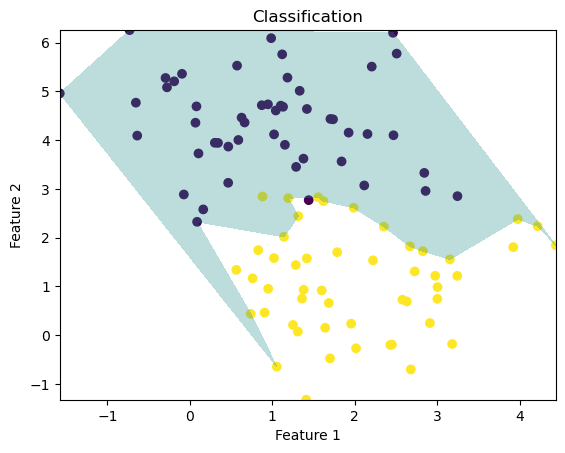

Epoch 0, Loss: 0.08182916171177587
Epoch 100, Loss: 0.08136330842035618
Epoch 200, Loss: 0.08092560476365772
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan


/tmp/ipykernel_3246/146204086.py:22: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
/tmp/ipykernel_3246/146204086.py:22: RuntimeWarning: invalid value encountered in multiply
  loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


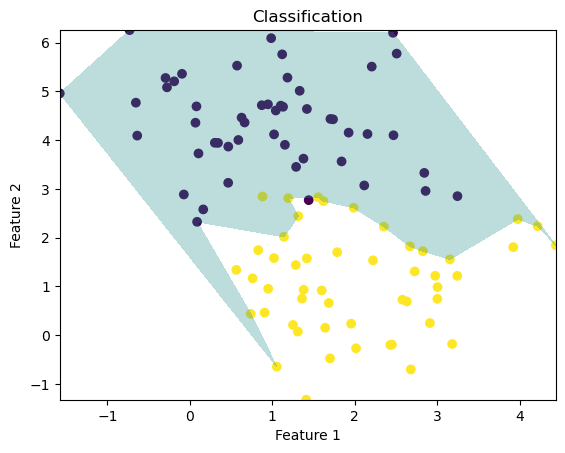

Epoch 0, Loss: nan
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan


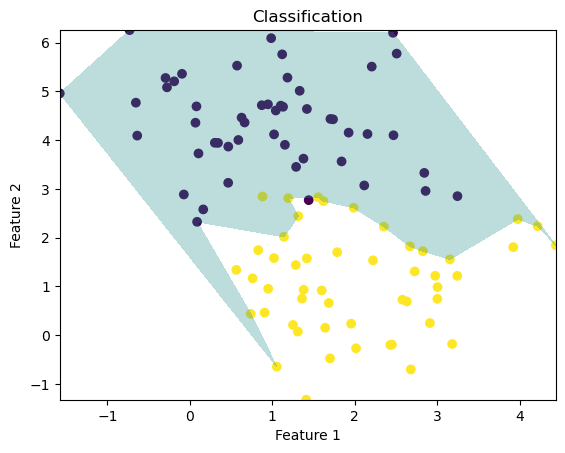

Epoch 0, Loss: nan
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan


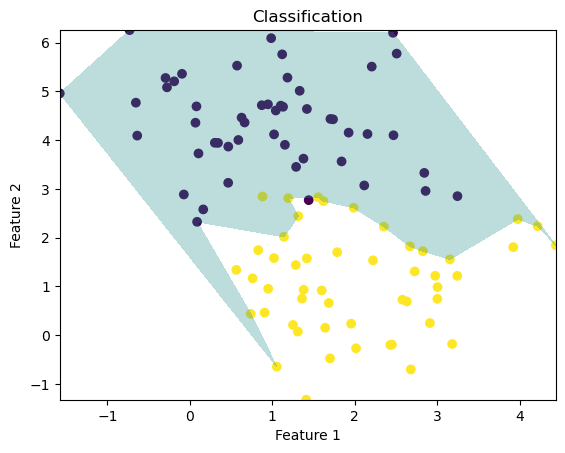

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)

network = TwoLayerNeuralNetwork(hidden_size=10)


for _ in range(10):
    network.fit(X, np.array([y]).T, num_epochs=1000, learning_rate=0.1)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.tricontourf(X[:, 0], X[:, 1], np.round(network.forward(X).T[0]), cmap='viridis', levels=[0,1], alpha=0.3)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Сlassification")
    plt.show()



